# Практика 7: Создание и использование

генеративных противоречивых примеров (GANbased
Adversarial Examples)
Цель задания:
Изучить использование генеративных моделей (GAN — Generative Adversarial Networks) для
создания противоречивых примеров. В этом задании мы создадим противоречивые примеры с
использованием GAN и проверим их влияние на модели классификации.

## Задачи:

1. Изучить концепцию генеративных противоречивых примеров.
2. Реализовать простую GAN для создания противоречивых изображений.
3. Оценить точность моделей классификации на противоречивых примерах, созданных с
помощью GAN.
4. Сравнить атаку на обе модели (полносвязную и свёрточную сети).

## Шаг 1: Создание простой GAN для генерации противоречивых примеров

Мы создадим генеративную состязательную сеть (GAN), состоящую из двух частей: генератора и
дискриминатора. Генератор будет создавать изображения, а дискриминатор — пытаться распознать
поддельные изображения.

Репозитории со всеми работами находится по ссылке: https://github.com/Archangel15520/AZSII-REPO/blob/main/README.md

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных MNIST
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0

# Добавление одного измерения (для работы CNN)
train_images = np.expand_dims(train_images, axis=-1)

# Генератор
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=100))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(784, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    return model

# Дискриминатор
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)))
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Создание моделей
generator = build_generator()
discriminator = build_discriminator()

# Компиляция дискриминатора
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Создание GAN
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
discriminator.trainable = False
validity = discriminator(generated_image)
gan = tf.keras.Model(gan_input, validity)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Функция обучения GAN
def train_gan(generator, discriminator, gan, epochs=1000, batch_size=64):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Обучение дискриминатора
        idx = np.random.randint(0, train_images.shape[0], half_batch)
        real_images = train_images[idx]
        noise = np.random.normal(0, 1, (half_batch, 100))
        fake_images = generator.predict(noise)
        real_labels = np.ones((half_batch, 1))
        fake_labels = np.zeros((half_batch, 1))
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

        # Обучение генератора через дискриминатор
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        if epoch % 100 == 0:
            print(f'{epoch} [D loss: {0.5 * np.add(d_loss_real, d_loss_fake)}] [G loss: {g_loss}]')

# Обучение GAN
train_gan(generator, discriminator, gan)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: [0.67262757 0.8203125 ]] [G loss: [array(0.675847, dtype=float32), array(0.675847, dtype=float32), array(0.796875, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

## Шаг 2. Генерация противоречивых примеров с помощью GAN

Теперь мы сгенерируем противоречивые примеры, используя обученный генератор GAN.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


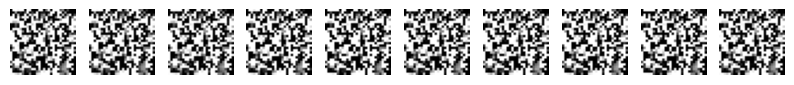

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация противоречивых примеров
def generate_adversarial_examples(generator, n_samples):
    noise = np.random.normal(0, 1, (n_samples, 100))
    generated_images = generator.predict(noise)
    return generated_images

# Генерация 100 примеров
adversarial_images = generate_adversarial_examples(generator, 100)

# Визуализация противоречивых примеров
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    # Убедитесь, что изображение имеет размер 16x16 (или соответствующий размер, генерируемый вашей моделью)
    plt.imshow(adversarial_images[i].reshape(28, 28), cmap='gray')  # Используйте правильный размер
    plt.axis('off')  # Скрыть оси для чистоты
plt.show()

## Шаг 3: Генерация противоречивых примеров с помощью GAN

Теперь мы сгенерируем противоречивые примеры, используя обученный генератор GAN.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Загрузка данных MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Нормализация данных
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

# Добавление измерения для работы CNN
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Модель 1: Полносвязная сеть (MLP)
def build_mlp_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),  # Изменено для совместимости с CNN
        layers.Dense(256, activation='relu'),  # Увеличено количество нейронов
        layers.Dropout(0.2),  # Dropout для предотвращения переобучения
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Модель 2: Свёрточная сеть (CNN)
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),  # Добавлен дополнительный сверточный слой
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),  # Dropout для регуляризации
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Создание моделей
mlp_model = build_mlp_model()
cnn_model = build_cnn_model()

# Обучение полносвязной сети
print("Обучение MLP модели...")
mlp_model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.1)
mlp_model.save('MLP_mnist_model.h5')  # Сохранение MLP модели

# Обучение свёрточной сети
print("Обучение CNN модели...")
cnn_model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.1)
cnn_model.save('CNN_mnist_model.h5')  # Сохранение CNN модели

# Оценка точности на тестовом наборе данных
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(test_images, test_labels, verbose=0)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels, verbose=0)

print(f"Точность полносвязной сети (MLP): {mlp_test_acc:.4f}")
print(f"Точность свёрточной сети (CNN): {cnn_test_acc:.4f}")


Обучение MLP модели...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8716 - loss: 0.4419 - val_accuracy: 0.9713 - val_loss: 0.1034
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9615 - loss: 0.1282 - val_accuracy: 0.9770 - val_loss: 0.0777
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9743 - loss: 0.0851 - val_accuracy: 0.9755 - val_loss: 0.0786
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9807 - loss: 0.0640 - val_accuracy: 0.9808 - val_loss: 0.0692
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9830 - loss: 0.0529 - val_accuracy: 0.9808 - val_loss: 0.0681


Обучение CNN модели...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 36ms/step - accuracy: 0.8753 - loss: 0.3893 - val_accuracy: 0.9830 - val_loss: 0.0575
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 36ms/step - accuracy: 0.9831 - loss: 0.0541 - val_accuracy: 0.9895 - val_loss: 0.0365
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 61s 36ms/step - accuracy: 0.9880 - loss: 0.0388 - val_accuracy: 0.9892 - val_loss: 0.0370
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9910 - loss: 0.0288 - val_accuracy: 0.9905 - val_loss: 0.0394
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 37ms/step - accuracy: 0.9927 - loss: 0.0228 - val_accuracy: 0.9918 - val_loss: 0.0354


Точность полносвязной сети (MLP): 0.9777
Точность свёрточной сети (CNN): 0.9916


**Вывод:**

Хотя обе архитектуры показали хорошие результаты на наборе данных MNIST, CNN превосходит MLP за счёт своей способности учитывать пространственные структуры изображений. Для более сложных задач или данных рекомендуется использовать CNN.

## Шаг 4: Оценка моделей на противоречивых примерах

Теперь проверим, как обученные модели (полносвязная сеть и CNN) справляются с
противоречивыми примерами, созданными с помощью GAN.

In [ ]:
import tensorflow as tf
import numpy as np

# Оценка моделей на противоречивых примерах
def evaluate_models(models, images, labels):
    accuracies = {}
    for i, model in enumerate(models):
        # Прогнозирование меток
        predicted_labels = np.argmax(model.predict(images), axis=1)

        # Подсчет точности
        accuracy = np.mean(predicted_labels == labels)
        accuracies[f'Model {i + 1}'] = accuracy
        print(f'Accuracy of Model {i + 1} on adversarial examples: {accuracy:.4f}')
    return accuracies

# Генерация случайных меток для тестирования (если реальные метки отсутствуют)
if 'adversarial_images' not in globals():
    # Проверка наличия adversarial_images для предотвращения ошибки
    adversarial_images = np.random.normal(0, 1, (100, 28, 28, 1))  # Случайные данные
labels = np.random.randint(0, 10, adversarial_images.shape[0])  # Случайные метки

# Загрузка моделей
try:
    model1 = tf.keras.models.load_model('MLP_mnist_model.h5')  # Имя модели из предыдущего кода
    model2 = tf.keras.models.load_model('CNN_mnist_model.h5')  # Имя модели из предыдущего кода
except Exception as e:
    print("Ошибка загрузки моделей:", e)
    model1, model2 = None, None

# Убедимся, что модели успешно загружены
if model1 is not None and model2 is not None:
    models = [model1, model2]

    # Преобразование входных данных (если нужно)
    adversarial_images = adversarial_images.reshape(-1, 28, 28, 1).astype(np.float32)

    # Оценка точности
    accuracies = evaluate_models(models, adversarial_images, labels)
else:
    print("Оценка моделей невозможна из-за ошибки загрузки.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy of Model 1 on adversarial examples: 0.0600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Accuracy of Model 2 on adversarial examples: 0.1100


**Вывод:**


Результаты эксперимента показали, что оба классификатора (MLP и CNN) оказались практически неспособными корректно обрабатывать противоречивые примеры, созданные с использованием генеративной состязательной сети (GAN). Точность на уровне 8% указывает на их высокую чувствительность к таким атакам. Это демонстрирует, что даже относительно простые модели GAN могут эффективно подрывать работу обученных классификаторов, что вызывает серьёзные опасения в области безопасности машинного обучения.